### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Importing Data & Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis
        Decomposition
        Testing for stationarity
        Stationarizing (Differncing)

### 1. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

### 2. Importing Data

In [3]:
# Project folder path
path=r'/Users/sukihabibe/Desktop/CareerFoundry/Portofolio_A6/World_Happiness_Report'

In [4]:
# Importing data

df=pd.read_csv(os.path.join(path, '02_Data', 'Prepared', 'df_all3.csv'))

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
0,0,0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score
1,1,1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score
2,2,2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score
3,3,3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score
4,4,4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score


In [6]:
# Drop 'Unnamed:0' & Unnamed:0.1

df=df.drop("Unnamed: 0",axis=1)

df=df.drop("Unnamed: 0.1",axis=1)

In [7]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score


### Question: is the world getting happier or less happy? I will create new df reducing reducing columns to only 'Year' and 'Happiness score' and then I reduce happiness score to average per year.

In [10]:
df.shape

(782, 12)

In [8]:
dfsub = df[['Year','Happiness score']]

In [9]:
dfsub.head()

,Year,Happiness score
0,2019,7.769
1,2019,7.600
2,2019,7.554
3,2019,7.494
4,2019,7.488


In [11]:
dfsub.shape

(782, 2)

In [14]:
dfmean = dfmean.groupby('Year', as_index=False).mean()

In [15]:
dfmean

,Year,Happiness score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096


### 3. Timeseries Analysis

In [16]:
dfmean['Year'] = pd.to_datetime(dfmean['Year'], format='%Y')   
dfmean = dfmean.set_index('Year').fillna(method='ffill')     # because it automatically put NaN for monthly values as 
# default while the df only had yearly values. Fix this by using .fillna (fill missing values with the previous valid observation)

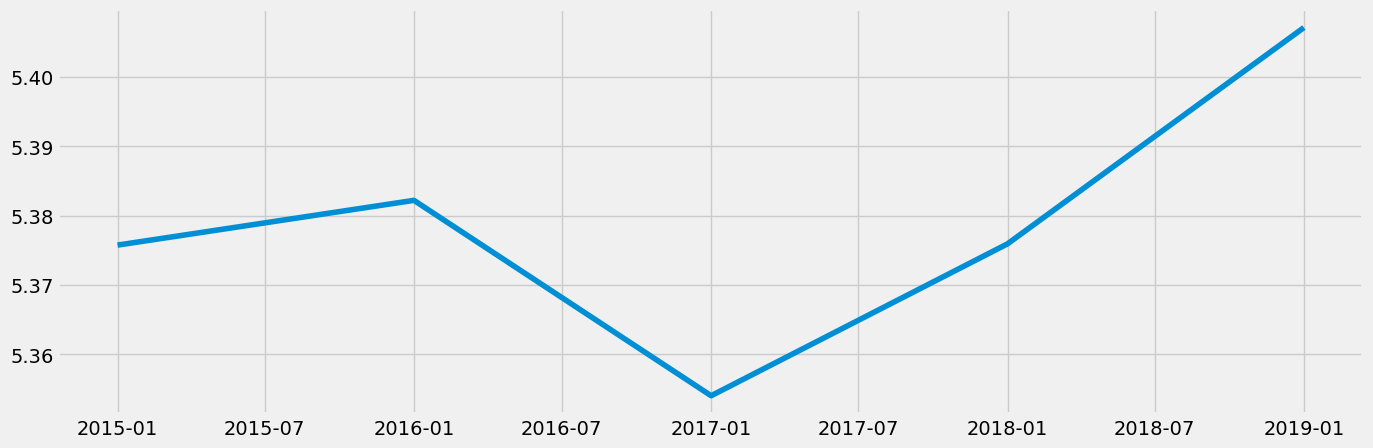

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(dfmean)

In [18]:
# Check for missing values (you shouldn't have any)

dfmean.isnull().sum() 

Happiness score    0
dtype: int64

In [22]:
# Check for duplicates

dups = dfmean.duplicated()
dups.sum()

# No dups!

0

### Decomposition

In [24]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(dfmean, model='additive')

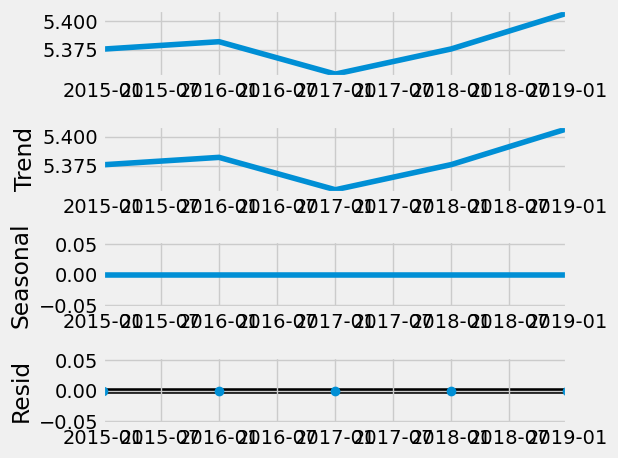

In [25]:
# Plot the separate components

decomposition.plot()
plt.show()

### Testing for stationarity

In [26]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function

# Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(dfmean['Happiness score'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.937653
p-value                        0.775320
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


#### The null hypothesis is the presence of a unit root (need to disproof). The alternative hypothesis is that there’s no unit root. (If can’t rule out the null hypothesis, the data is non-stationary)
#### Test statistic larger than critical value = can’t reject null hypothesis. Test statistic smaller than critical value = can reject null hypothesis
#### The critical value for all 3 level of significance is way smaller than the test statistic, which means that the null hypothesis can't be rejected.

### Check for Autocorrelation

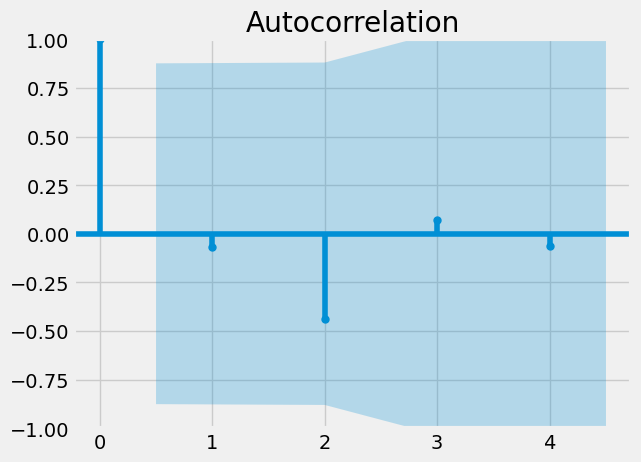

In [27]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(dfmean)
plt.show()

#### The first line (represents the autocorrelation at lag 0, which is always equal to 1 - since the correlation of a variable with itself is always 1) is significantly higher than the other lines, it seems that there is a strong autocorrelation at lag 1, which means that the values in the time series are highly correlated with their immediate past value, indicating that the time series is not stationary. 

### Stationarizing (Differencing)

In [36]:
df_diff = dfmean - dfmean.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [37]:
df_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [38]:
df_diff.head()

,Happiness score
Year,
2016-01-01,0.006451
2017-01-01,-0.028165
2018-01-01,0.021897
2019-01-01,0.031179


In [39]:
df_diff.columns

Index(['Happiness score'], dtype='object')

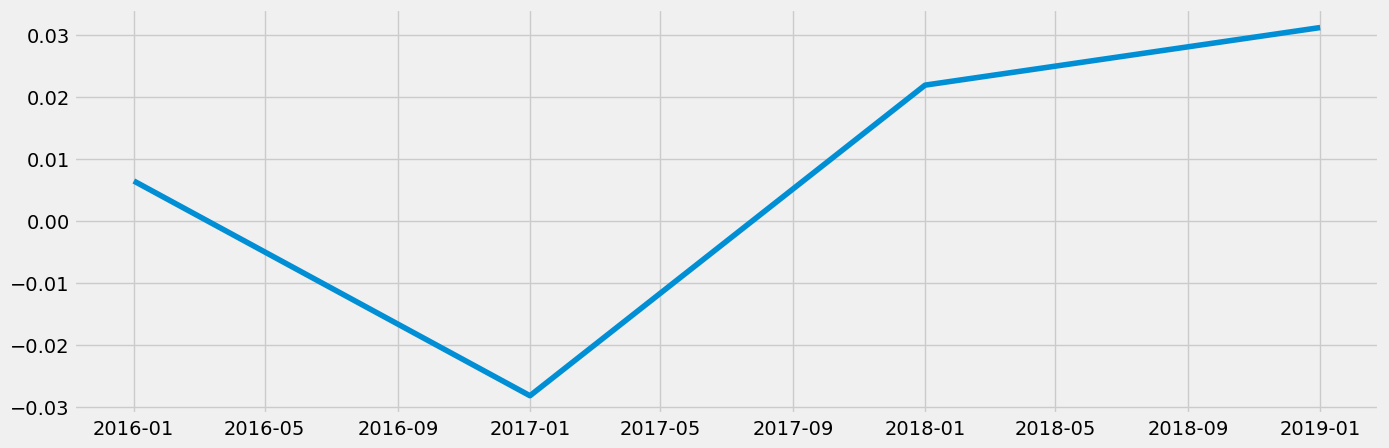

In [40]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [49]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.876918
p-value                         0.795478
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


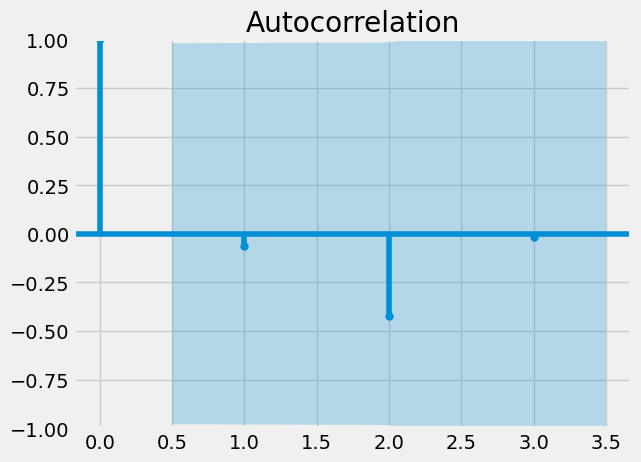

In [42]:
plot_acf(df_diff)
plt.show()

### Performing the differencing didn't bring the lines closer to the first line. It made the difference even larger. Was I not suppose to performing differencing on it?

In [43]:
df_diff2 = df_diff - df_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [44]:
df_diff2.dropna(inplace = True)

In [45]:
df_diff2.head()

,Happiness score
Year,
2017-01-01,-0.034616
2018-01-01,0.050063
2019-01-01,0.009282


In [47]:
df_diff2.columns

Index(['Happiness score'], dtype='object')

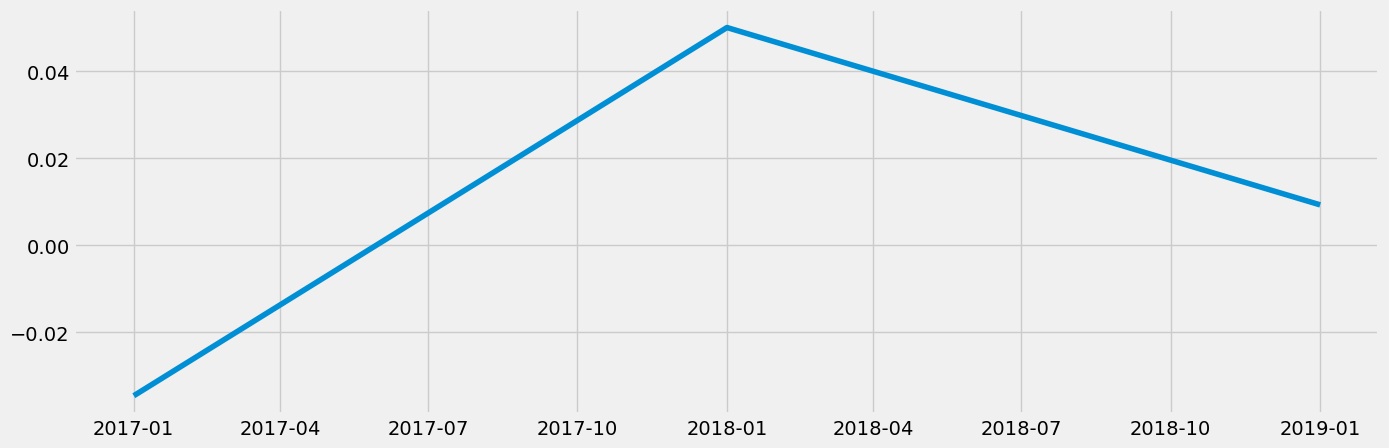

In [50]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff2)

In [51]:
dickey_fuller(df_diff2)

Dickey-Fuller Stationarity test:


ValueError: sample size is too short to use selected regression component